<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/MM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| no. Paquete | T. llegada | T. salida | Tiempo de arribo | Inicio de servicio | Hora de salida | Tiempo en fila | Tiempo en el sistema |
|-------------|------------|-----------|-------------------|---------------------|-----------------|----------------|------------------------|
| 1           | 2          | 12        | 2                 | 2                   | 14              | 0              | 12                     |
| 2           | 5          | 10        | 7                 | 14                  | 24              | 7              | 17                     |
| 3           | 1          | 16        | 8                 | 24                  | 40              | 16             | 32                     |
| 4           | 4          | 9         | 12                | 40                  | 49              | 28             | 37                     |
| 5           | 1          | 10        | 13                | 49                  | 59              | 36             | 46                     |
| 6           | 3          | 13        | 16                | 59                  | 72              | 43             | 56                     |
| 7           | 3          | 17        | 19                | 72                  | 89              | 53             | 70                     |
| 8           | 2          | 10        | 21                | 89                  | 99              | 68             | 78                     |
| 9           | 4          | 8         | 25                | 99                  | 107             | 74             | 82                     |
| 10          | 5          | 12        | 30                | 107                 | 119             | 77             | 89                     |


In [266]:
import random
import math

In [267]:
# Datos de la tabla
tiempos_llegada = [2, 5, 1, 4, 1, 3, 3, 2, 4, 5]      # T. llegada
tiempos_servicio = [12, 10, 16, 9, 10, 13, 17, 10, 8, 12]  # T. salida

# Medias
lambda_media = sum(tiempos_llegada) / len(tiempos_llegada)
mu_media = sum(tiempos_servicio) / len(tiempos_servicio)

print("Lambda (media de tiempos entre llegada):", lambda_media)
print("Mu (media de tiempos de servicio):", mu_media)

Lambda (media de tiempos entre llegada): 3.0
Mu (media de tiempos de servicio): 11.7


**Simulación M/M/1**

In [268]:
import random
from math import exp, log
from math import inf as infinity
import matplotlib.pyplot as plt

In [269]:
# Parámetros
tpll = 2.0
tps = 1.0
T = 100
N = 0
t = 0.0

# Listas
tiempos = [t]
clientes = [N]

Sin muertes:

In [270]:
# Simulación
while t <= T:
    N = N + 1
    t = t + random.expovariate(1 / tpll)
    tiempos.append(t)
    clientes.append(N)

In [271]:
# Resultado
print("Número de clientes en el sistema durante el intervalo:", N)

Número de clientes en el sistema durante el intervalo: 52


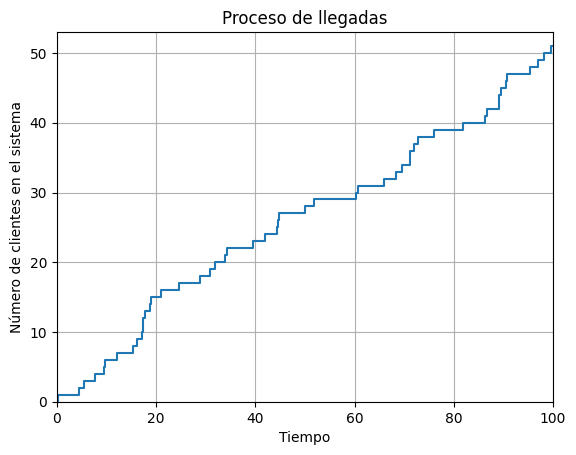

In [272]:
# Gráfica tipo escalón
plt.step(tiempos, clientes, where="post")
plt.xlabel("Tiempo")
plt.ylabel("Número de clientes en el sistema")
plt.title("Proceso de llegadas")
plt.xlim(0, T)
plt.ylim(0, max(clientes) + 1)
plt.grid(True)
plt.show()

Con muertes:

In [273]:
t = 0.0
N = 0

X = []
Y = []

# Simulación
while t <= T:

    # generar tiempos
    tll = random.expovariate(1.0 / tpll) # llegada
    ts  = random.expovariate(1.0 / tps) # servicio

    # evento: llegada
    if tll < ts:
        N += 1
        t += tll
        X.append(t)
        Y.append(N)

    # evento: salida
    else:
        if N > 0:
            N -= 1
        t += ts
        X.append(t)
        Y.append(N)

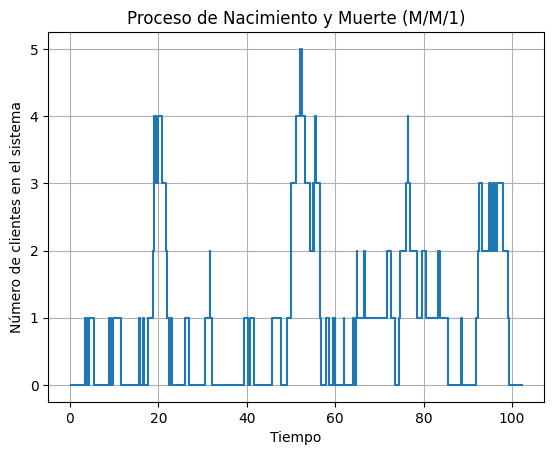

In [274]:
# Gráfica escalonada X vs Y
plt.step(X, Y, where="post")
plt.xlabel("Tiempo")
plt.ylabel("Número de clientes en el sistema")
plt.title("Proceso de Nacimiento y Muerte (M/M/1)")
plt.grid(True)
plt.show()